In [111]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [112]:
# Инициализировать данные
df = pd.read_csv("C:/Users/ludkov-as/repo/ml_base/salary_data.csv")
display(df.head(5))

X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [113]:
# Класс, реализовывающий линейную регрессию с градиентным спуском
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    # Функция обучения модели
    def fit(self, X, y):
        # Задать случайные и ненулевые значения начальных весов модели
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []
        
        for _ in range(self.n_iter):
            self.update_weights(X, y)
        return self
    
    # Функция обновления весов модели
    def update_weights(self, X, y):
        output = self.net_input(X)
        errors = (y - output)

        # Коэффициент масштабирования в условиях данной задачи примем за 1
        self.w_ += self.eta * 1.0 * X.T.dot(errors) / X.shape[0]
        self.b_ += self.eta * 1.0 * errors.mean()
        loss = (errors ** 2).mean()
        self.losses_.append(loss)
        return self
    
    # Функция фактического ввода
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    # Функция предсказания
    def predict(self, X):
        return self.net_input(X)

In [114]:
# Создать экземпляр класса и обучить модель
model = LinearRegressionGD(eta=0.01, n_iter=1000).fit(X, y)

# Получить предсказанные значения целевой переменной
y_pred = model.predict(X)

# Вывести полученных значения весов и смещения
print("w:", *np.round(model.w_, 2))
print("b:", *np.round(model.b_, 2))

w: 9876.11
b: 22920.49


In [115]:
# Указать метрики
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Absolute Error = {mae:.3f}\nMean Squared Error = {mse:.3f}\nR2-score = {r2:.3f}")

Mean Absolute Error = 4657.504
Mean Squared Error = 33053746.659
R2-score = 0.955


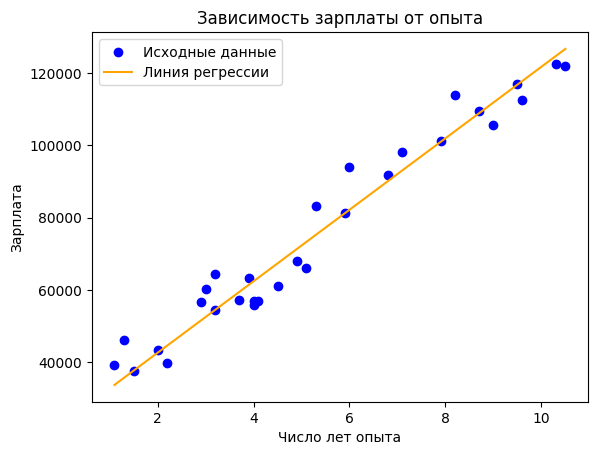

In [116]:
# Построить соответствующий график зависимости зарплаты от опыта
plt.scatter(X, y, color = 'blue', label='Исходные данные')
plt.plot(X, y_pred, color = 'orange', label='Линия регрессии')
plt.title('Зависимость зарплаты от опыта')
plt.xlabel('Число лет опыта')
plt.ylabel('Зарплата')
plt.legend()

plt.show()

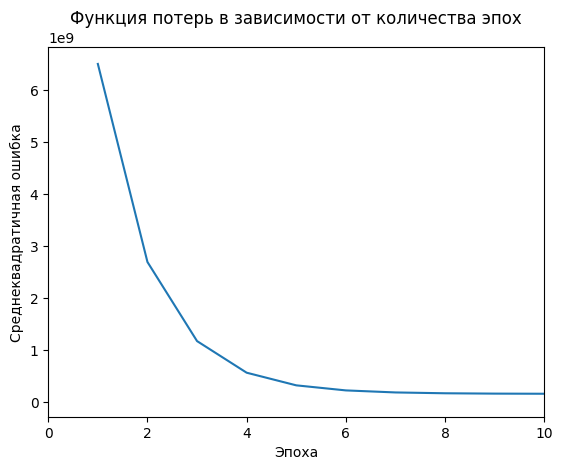

In [117]:
# Дополнительно построить график сходимости алгоритма градиентного спуска от количества эпох
plt.plot(range(1, model.n_iter + 1), model.losses_)
plt.title('Функция потерь в зависимости от количества эпох')
plt.xlabel('Эпоха')
plt.ylabel('Среднеквадратичная ошибка')
plt.xlim(0, 10)
plt.show()